In [6]:
import pandas as pd

In [7]:
X = pd.read_excel("cars.xlsx")

In [8]:
X=X.set_index(['Country','Car'])

In [49]:
X


MPG  Weight  Drive_Ratio  Horsepower  \
Country Car                                                                
U.S.    Buick Estate Wagon         16.9   4.360         2.73         155   
        Ford Country Squire Wagon  15.5   4.054         2.26         142   
        Chevy Malibu Wagon         19.2   3.605         2.56         125   
        Chrysler LeBaron Wagon     18.5   3.940         2.45         150   
        Chevette                   30.0   2.155         3.70          68   

                                   Displacement  Cylinders  
Country Car                                                 
U.S.    Buick Estate Wagon                  350          8  
        Ford Country Squire Wagon           351          8  
        Chevy Malibu Wagon                  267          8  
        Chrysler LeBaron Wagon              360          8  
        Chevette                             98          4

In [10]:
n=X.shape[0]
p=X.shape[1]
print(n,p)

5 6


In [11]:
import sklearn

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Z=sc.fit_transform(X)
print(Z)

[[-0.60551597  0.95414664 -0.01985284  0.85228224  0.6512724   0.5       ]
 [-0.87722186  0.55809554 -0.95293633  0.44192412  0.6613229   0.5       ]
 [-0.15914202 -0.02303827 -0.35735113 -0.09469803 -0.1829191   0.5       ]
 [-0.29499496  0.41054709 -0.57573237  0.69445219  0.7517774   0.5       ]
 [ 1.93687481 -1.899751    1.90587267 -1.89396053 -1.8814536  -2.        ]]


In [13]:
import numpy
print(numpy.mean(Z,axis=0))

[ 0.00000000e+00 -2.22044605e-16  5.32907052e-16  4.44089210e-17
  1.33226763e-16 -8.88178420e-17]


In [36]:
print(numpy.std(Z,axis=0))

[1. 1. 1. 1. 1. 1.]


In [37]:
from sklearn.decomposition import PCA

In [38]:
print(PCA)

<class 'sklearn.decomposition._pca.PCA'>


In [39]:
acp=PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [40]:
coord=acp.fit_transform(Z)

In [41]:
print(acp.n_components_)

5


In [42]:
print(coord)

[[-1.47026469e+00  6.91725582e-01  1.78709001e-01  7.66866676e-02
   7.36215665e-17]
 [-1.62645276e+00 -3.49478701e-01 -1.71325279e-01  2.73651368e-01
   7.36215665e-17]
 [-2.88603197e-01 -4.93900294e-01  3.24144035e-01 -1.16983855e-01
   7.36215665e-17]
 [-1.31658627e+00  6.76236272e-02 -2.71905055e-01 -2.69382783e-01
   7.36215665e-17]
 [ 4.70190692e+00  8.40297862e-02 -5.96227023e-02  3.60286024e-02
   7.36215665e-17]]


In [43]:
print((n-1)/n*acp.explained_variance_)

[5.74632935e+00 1.71238221e-01 4.87691678e-02 3.36632566e-02
 5.42013506e-33]


In [44]:
print(acp.singular_values_**2/n)

[5.74632935e+00 1.71238221e-01 4.87691678e-02 3.36632566e-02
 5.42013506e-33]


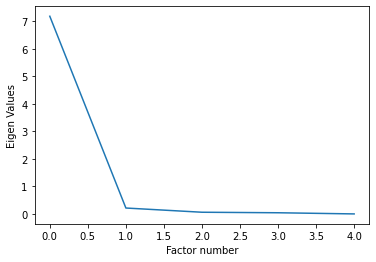

In [45]:
import matplotlib.pyplot as plt
import numpy as np
eigval=acp.explained_variance_
plt.plot(np.arange(5),eigval)
plt.ylabel("Eigen Values")
plt.xlabel("Factor number")
plt.show()

In [46]:
eigval

array([7.18291169e+00, 2.14047776e-01, 6.09614598e-02, 4.20790707e-02,
       6.77516882e-33])

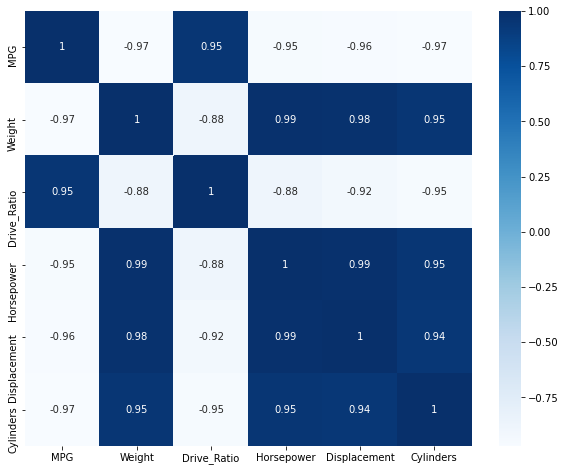

In [47]:
import seaborn as sns
corr=X.corr()
corr=corr.round(2)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap="Blues",annot=True)
plt.show()

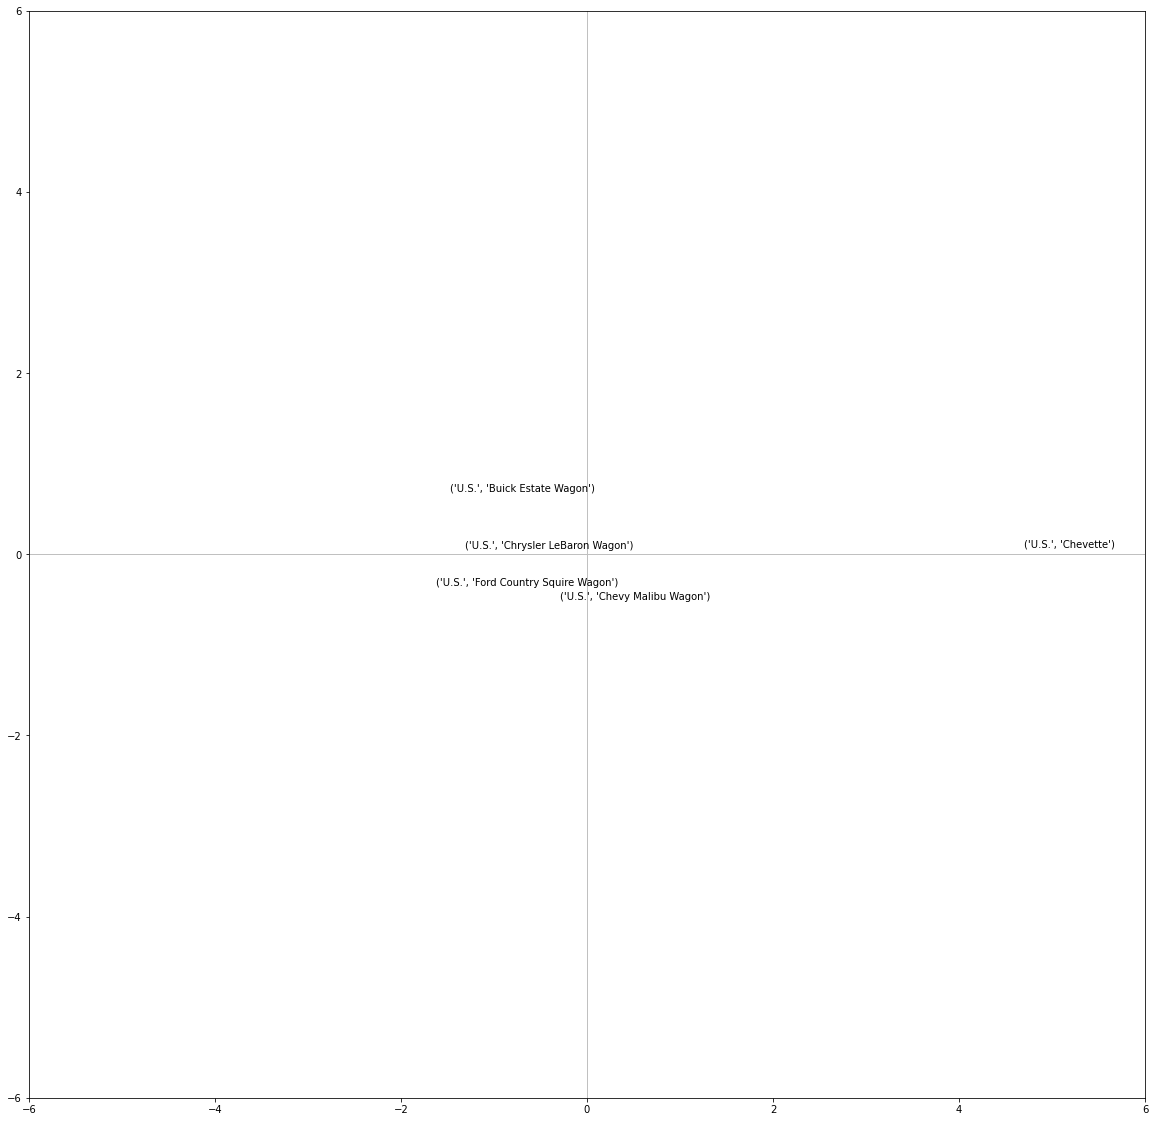

In [27]:
f,ax=plt.subplots(figsize=(20,20))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)  
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics 

res=[] 
wcss=[]

range_n_cluster = range(2,5)
for k in range_n_cluster:   
    km = KMeans(n_clusters=k) 
    km.fit(coord) 
    res.append(metrics.silhouette_score(coord,km.labels_) )
    wcss.append(km.inertia_)

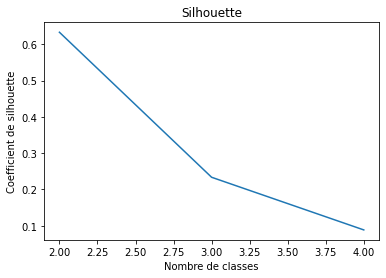

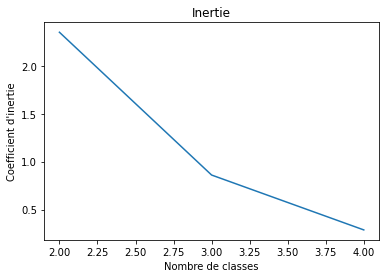

In [33]:
#plot nb. clusters vs. silhouette score 
import matplotlib.pyplot as plt 
plt.plot(np.arange(2,5,1),res) 
plt.title("Silhouette")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient de silhouette")
plt.show() 

#plot nb. clusters vs. Inertie score 
import matplotlib.pyplot as plt 
plt.plot(np.arange(2,5,1),wcss) 
plt.title("Inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient d'inertie")
plt.show() 

In [34]:
km = KMeans(n_clusters=4) 
km.fit(coord) 
km.labels_
cluster_labels = km.fit_predict(coord)
cluster_labels

array([0, 2, 3, 2, 1])

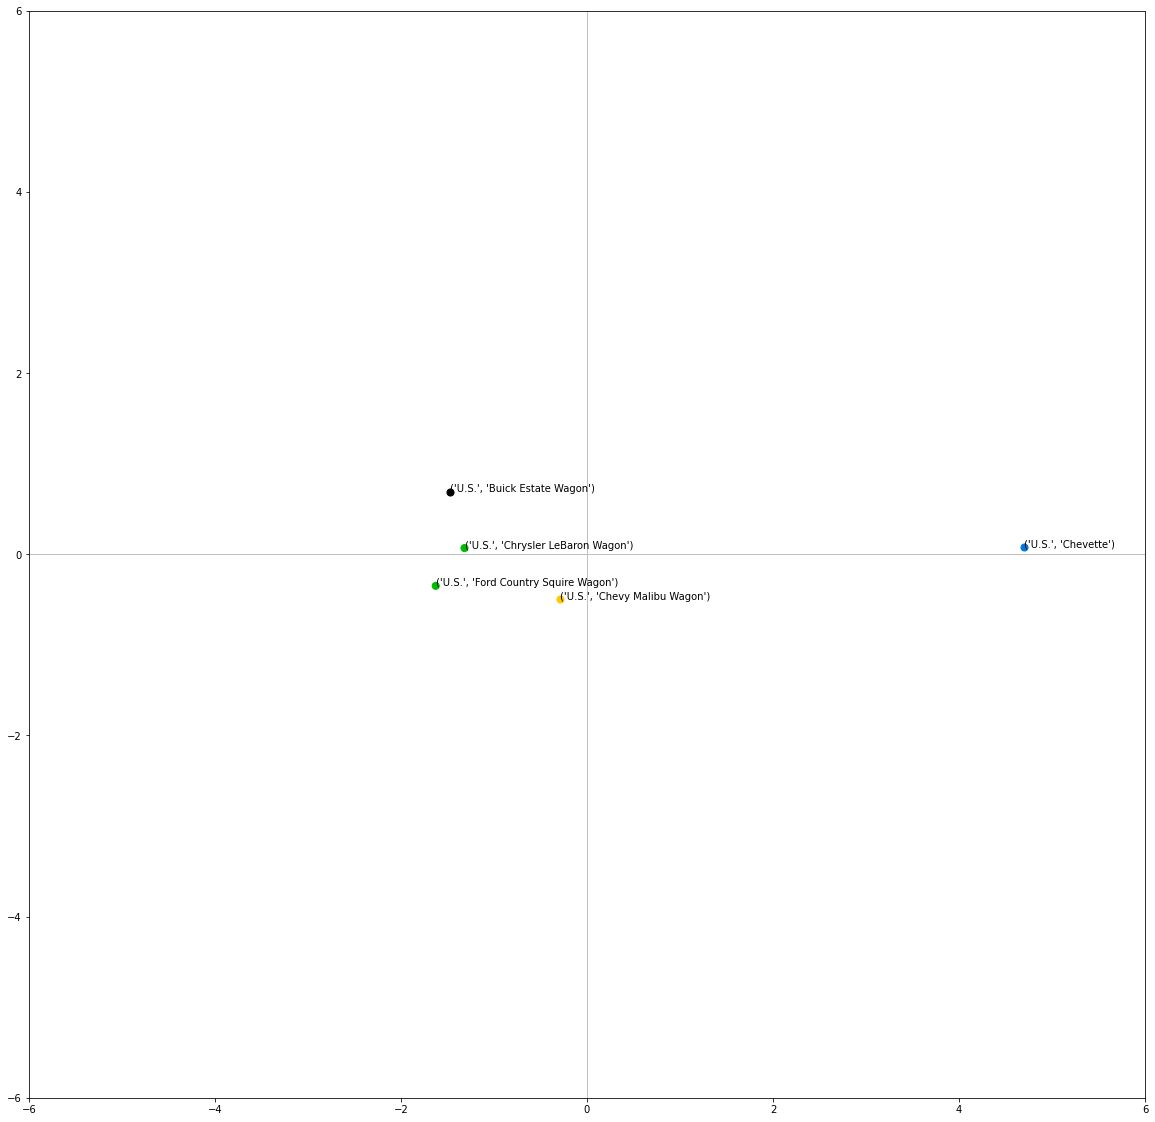

In [35]:
import matplotlib.cm as cm


f,ax = plt.subplots(figsize=(20,20))
#fig, axes = plt.plot(figsize=(12,12))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
n = X.shape[0]

colors = cm.nipy_spectral(cluster_labels/4)

# Traçage du nuage de points
for k in range(4):
    is_kth_cluster = (cluster_labels==k)
    ax.scatter(coord[is_kth_cluster,0],coord[is_kth_cluster,1],c=colors[is_kth_cluster],s=50)

## AGRUPACIONES

for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
    plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()